# Basic Hand Gestures Classification Based on Surface Electromyography (SEMG)

Utilizaremos o método CRISP-DM para realizar a tarefa de classificação dos dados a seguir:

https://archive.ics.uci.edu/ml/datasets/sEMG+for+Basic+Hand+movements




## O que é CRISP-DM?

O *Cross Industry Standard Process for Data Mining* (CRISP-DM) é um modelo de processo com seis fases que descreve naturalmente o ciclo de vida da ciência dos dados. É como um conjunto de guias para ajudar a planear, organizar, e implementar o seu projeto de ciência de dados (ou aprendizagem de máquina). Os 6 guias são:

    Compreensão do negócio - O que é que o negócio precisa?
    Compreensão de dados - Que dados temos / precisamos? Está limpo?
    Preparação dos dados - Como organizamos os dados para a modelagem?
    Modelação - Que técnicas de modelação devemos aplicar?
    Avaliação - Qual o modelo que melhor satisfaz os objectivos do negócio?
    Implantação - Como é que as partes interessadas acedem aos resultados?


## Compreensão do negócio e compreensão dos dados

O *dataset* inclui 2 bases de dados de sinais eletromiográficos de superfície de 6 movimentos da mão utilizando o Sistema EMG da Delsys. Os sujeitos saudáveis realizaram seis movimentos diários de apreensão. A eletromiografia de superfície (sEMG) é um método não invasivo de medição da atividade bioelétrica dos músculos, ele é utilizado tanto no diagnóstico de doenças do sistema muscular como no desenvolvimento de interfaces homem-máquina. 

Os participantes realizaram repetidamente os seis movimentos seguintes:

> a) Esférico: para segurar ferramentas esféricas;

> b) Ponta: para segurar pequenas ferramentas;

> c) Palmar: para agarrar com a palma da mão virada para o objeto;

> d) Lateral: para segurar objetos finos e planos;

> e) Cilíndrico: para segurar ferramentas cilíndricas;

> f) Gancho: para suportar uma carga pesada.



Estão incluídas duas bases de dados diferentes:

* 5 indivíduos saudáveis (dois homens e três mulheres) da mesma idade aproximadamente (20 a 22 anos) conduziram os 6 movimentos 30 vezes cada um. O tempo medido é de 6 segundos. Há um arquivo para cada participante na base de dados.
* 1 sujeito saudável (masculino, 22 anos de idade) conduziu os 6 movimentos 100 vezes cada um, totalizando um total de 600 movimentos, durante 3 dias consecutivos. O tempo medido é de 5 segundos. Há um arquivo apenas para ele. 

O problema apresentado no conjunto é um problema de classificação, onde é necessário identificar a classe (o gesto que está sendo feito) de cada linha. É interessante notar que utilizar o segundo dataset poderá resultar em uma acurácia maior do que o primeiro, pois é possível que um indivíduo possua algum vício na sua execução de algum gesto, assim realizando um mesmo gesto de uma forma muito semelhante todas as vezes que houver repetição dele. Como consequência, devido a uma forte correlação entre os sinais sEMG, uma precisão de classificação excepcional pode ser alcançada, mas um sobreajustamento significativo do classificador pode desfocar as conclusões.

Entretanto o primeiro conjunto de dados também possui uma desvantagem, ele carece no número de repetições de gestos, há apenas 30 repetições de cada gesto, as repetições são vitais para o desenvolvimento de algoritmos robustos de reconhecimento. Também é desaconselhado que se realize o mesmo gesto várias vezes seguidas, pois é provável que o sujeito realize o gesto de uma forma muito semelhante, o que também pode ter como consequência uma precisão de classificação muito alta. Abordagens que reduzem o risco de um sujeito executar cada gesto de forma idêntica são executar sequencialmente uma ordem de gestos ou fazer eles em ordem aleatória, no entanto ainda é vital incluir um grande número de repetições para diminuir o risco. 


## Compreensão dos dados e preparação dos dados

### Importação de bibliotecas

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
#from google.colab import drive
import missingno as msno
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from scipy.stats import sem
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
import sys
warnings.filterwarnings('ignore')
import pysiology.electromyography as electromyography
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#drive.mount('/content/gdrive')


Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore


### Importando e formatando os dados

Nessa seção iremos importar e formatar os dados, o repositório do UCI os disponibiliza em formato .mat, portanto devemos transformar esses dados para que possam ser utilizados com a biblioteca pandas do python

In [2]:
#matfile = '/content/gdrive/My Drive/data/female_1.mat'
matfile = 'data/male_day_1.mat'
mat = loadmat(matfile)
print(mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 18 12:44:17 2014', '__version__': '1.0', '__globals__': [], 'cyl_ch1': array([[ 0.123201,  0.199706,  0.276211, ...,  0.123201,  0.174205,
         0.403719],
       [ 0.123201,  0.225208,  0.199706, ..., -0.233821,  0.021195,
         0.0977  ],
       [ 0.174205,  0.225208,  0.123201, ...,  0.0977  ,  0.199706,
        -0.029808],
       ...,
       [ 0.0977  ,  0.174205,  0.199706, ...,  0.0977  ,  0.148703,
         0.0977  ],
       [ 0.225208,  0.148703,  0.123201, ...,  0.148703,  0.148703,
         0.0977  ],
       [ 0.123201,  0.199706,  0.072198, ...,  0.174205,  0.021195,
         0.046696]]), 'cyl_ch2': array([[ 0.278708,  0.380739,  0.380739, ...,  0.227693, -0.154923,
         0.125662],
       [ 0.431755,  0.125662,  0.508278, ...,  0.559294,  0.533786,
         0.992925],
       [ 0.584801, -0.0784  ,  0.329724, ..., -0.741602,  0.329724,
        -0.486524],
       ...,
       [ 0.635817,  0.3

### Juntando todos os dados dos 3 dias

In [3]:
matfile = 'data/male_day_1.mat'
mat = loadmat(matfile)
for key,values in mat.items():
    print(key)
    
df = pd.DataFrame(mat['hook_ch1'])
df["hand_mov"] = "hook"

df1 = pd.DataFrame(mat['cyl_ch1'])
df1["hand_mov"] = "cyl"

df2 = pd.DataFrame(mat['tip_ch1'])
df2["hand_mov"] = "tip"

df3 = pd.DataFrame(mat['spher_ch1'])
df3["hand_mov"] = "spher"

df4 = pd.DataFrame(mat['palm_ch1'])
df4["hand_mov"] = "palm"

df5 = pd.DataFrame(mat['lat_ch1'])
df5["hand_mov"] = "lat"

df_all = pd.concat([df,df1,df2,df3,df4,df5])

__header__
__version__
__globals__
cyl_ch1
cyl_ch2
hook_ch1
hook_ch2
tip_ch1
tip_ch2
palm_ch1
palm_ch2
spher_ch1
spher_ch2
lat_ch1
lat_ch2


In [4]:
matfile = 'data/male_day_2.mat'
mat = loadmat(matfile)
for key,values in mat.items():
    print(key)
    
df = pd.DataFrame(mat['hook_ch1'])
df["hand_mov"] = "hook"

df1 = pd.DataFrame(mat['cyl_ch1'])
df1["hand_mov"] = "cyl"

df2 = pd.DataFrame(mat['tip_ch1'])
df2["hand_mov"] = "tip"

df3 = pd.DataFrame(mat['spher_ch1'])
df3["hand_mov"] = "spher"

df4 = pd.DataFrame(mat['palm_ch1'])
df4["hand_mov"] = "palm"

df5 = pd.DataFrame(mat['lat_ch1'])
df5["hand_mov"] = "lat"

df_all1 = pd.concat([df,df1,df2,df3,df4,df5])

__header__
__version__
__globals__
cyl_ch1
cyl_ch2
hook_ch1
hook_ch2
tip_ch1
tip_ch2
palm_ch1
palm_ch2
spher_ch1
spher_ch2
lat_ch1
lat_ch2


In [5]:
matfile = 'data/male_day_3.mat'
mat = loadmat(matfile)
for key,values in mat.items():
    print(key)
    
df = pd.DataFrame(mat['hook_ch1'])
df["hand_mov"] = "hook"

df1 = pd.DataFrame(mat['cyl_ch1'])
df1["hand_mov"] = "cyl"

df2 = pd.DataFrame(mat['tip_ch1'])
df2["hand_mov"] = "tip"

df3 = pd.DataFrame(mat['spher_ch1'])
df3["hand_mov"] = "spher"

df4 = pd.DataFrame(mat['palm_ch1'])
df4["hand_mov"] = "palm"

df5 = pd.DataFrame(mat['lat_ch1'])
df5["hand_mov"] = "lat"

df_all2 = pd.concat([df,df1,df2,df3,df4,df5])

__header__
__version__
__globals__
cyl_ch1
cyl_ch2
hook_ch1
hook_ch2
tip_ch1
tip_ch2
palm_ch1
palm_ch2
spher_ch1
spher_ch2
lat_ch1
lat_ch2


In [6]:
df_all = pd.concat([df_all,df_all1,df_all2])

## Analise de estatística descritiva dos dados

In [7]:
df_all.shape

(1800, 2501)

In [8]:
df_all.describe() 

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
count,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,0.150800,0.149284,0.147499,0.144212,0.143135,0.147499,0.150927,0.149468,0.146578,0.151551,...,0.158195,0.157359,0.157430,0.145827,0.138361,0.139650,0.153336,0.142299,0.145614,0.140160
std,0.086425,0.100784,0.095723,0.093908,0.106889,0.093053,0.123015,0.094398,0.096322,0.104195,...,0.254935,0.274816,0.265947,0.269613,0.305276,0.297503,0.297020,0.277375,0.323763,0.297136
min,-0.539841,-1.100877,-1.228385,-0.794857,-1.789421,-0.616346,-2.069939,-0.922366,-0.896864,-1.381395,...,-1.891428,-2.962496,-2.069939,-3.243014,-2.962496,-3.447027,-3.039001,-2.528968,-6.915249,-4.186575
25%,0.123201,0.097700,0.097700,0.097700,0.097700,0.097700,0.097700,0.123201,0.097700,0.097700,...,0.072198,0.072198,0.097700,0.072198,0.072198,0.072198,0.072198,0.072198,0.072198,0.072198
50%,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,...,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703,0.148703
75%,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,0.199706,...,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208,0.225208
max,1.372781,1.959319,0.837247,1.219772,1.015759,1.092263,2.188834,1.219772,1.092263,1.347280,...,2.800873,2.367345,2.724368,1.933817,2.316342,1.857312,3.387410,1.908316,2.341844,2.137830


In [9]:
df_all.dtypes

0           float64
1           float64
2           float64
3           float64
4           float64
             ...   
2496        float64
2497        float64
2498        float64
2499        float64
hand_mov     object
Length: 2501, dtype: object

### Dados Nulos

Sempre é importante verificar se existem dados nulos em um conjunto de dados, para que seja feito seu tratamento ou sua retirada, caso seja necessário.

In [10]:
df_all.isnull().values.any()

False

No entanto aqui observamos que não há dados nulos nesse conjunto.

### Distribuição das classes

In [11]:
# Distribuição das classes
df_all[['hand_mov']].groupby('hand_mov')['hand_mov'].count() # Contando a quantidade de classes e suas respectivas quantidades

hand_mov
cyl      300
hook     300
lat      300
palm     300
spher    300
tip      300
Name: hand_mov, dtype: int64

<AxesSubplot:>

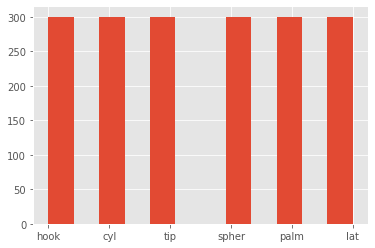

In [12]:
plt.style.use('ggplot')
plt.hist(df_all["hand_mov"],bins=12)
plt.gca()

Temos 6 classes nesse dataset, sendo elas nomeadas como: cyl, hook, tip, palm, spher e lat. Podemos observar que as classes são perfeitamente balanceadas, portanto não há necessidade de qualquer técnica de subsampling ou resampling.

### Matriz de correlação

A correlação é uma estatística muito comum e muito utilizada para analisar se há ligações entre variáveis ou se algum parâmetro pode ser um bom preditor para outro, portanto, tendo em mente que não se pode concluir que correlação implica em causualidade, é interessante plotar a matriz de correlação das variáveis do dataset.

In [13]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_all.drop("hand_mov",axis=1), 25))

Top Absolute Correlations
453  483    0.736354
473  483    0.719204
398  401    0.718001
456  483    0.690818
462  465    0.686015
441  483    0.662099
483  485    0.656877
514  518    0.650912
472  473    0.650725
555  556    0.634434
462  483    0.633687
554  556    0.633059
398  402    0.632042
453  456    0.623015
514  517    0.621993
482  483    0.619750
441  473    0.618563
472  475    0.615063
396  399    0.612066
     400    0.611413
514  515    0.608354
453  482    0.607638
483  515    0.602879
453  473    0.601943
468  483    0.594190
dtype: float64


Não é possível calcular a correlação quando temos uma variável categórica com mais de 2 classes, no entanto podemos realizar um procedimento chamado one-hot-encoding e avaliar a correlação entre as variáveis contínuas e as variáveis criadas com a transformação da categórica. 

Isto é, iremos avaliar se ch1 e ch2 tem correlação com o fato de uma linha ser classificada como cyl ou não, ou se possuem correlação com a classificação de hook ou não, por exemplo.

One-hot Encoding é um tipo de representação vetorial em que todos os elementos de um vetor são 0, exceto um, que tem como valor 1, onde 1 representa um booleano especificando uma categoria do elemento. Por exemplo no conjunto de dados a coluna hand_mov_palm só tera 1 onde a classe for palm. Ele representa a existência ou não dessa classificação, essa é uma maneira de representar variáveis categóricas como números sem denotar uma ordem de importância entre elas.

In [14]:
df_all_ohe = pd.get_dummies(df_all, prefix='hand_mov')
print(df_all_ohe.head())

          0         1         2         3         4         5         6  \
0  0.097700  0.148703  0.199706  0.225208  0.250710  0.199706  0.072198   
1  0.123201  0.123201  0.097700  0.174205  0.148703  0.021195  0.072198   
2  0.072198  0.072198  0.097700  0.174205  0.174205  0.148703  0.148703   
3  0.174205  0.174205  0.199706  0.199706  0.174205  0.225208  0.123201   
4  0.123201  0.199706  0.097700  0.097700  0.174205  0.174205  0.148703   

          7         8         9  ...      2496      2497      2498      2499  \
0  0.046696  0.072198  0.123201  ...  0.786244  0.225208 -0.055310 -0.106313   
1  0.199706  0.123201  0.123201  ...  0.225208  0.276211  0.199706  0.225208   
2  0.123201  0.123201  0.148703  ...  0.097700  0.174205  0.225208  0.199706   
3  0.123201  0.097700  0.072198  ...  0.174205  0.097700  0.123201  0.148703   
4  0.123201  0.097700  0.072198  ...  0.072198  0.021195  0.046696  0.021195   

   hand_mov_cyl  hand_mov_hook  hand_mov_lat  hand_mov_palm  hand_mo

In [15]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_all_ohe, 50))

Top Absolute Correlations
453   483     0.736354
473   483     0.719204
398   401     0.718001
456   483     0.690818
462   465     0.686015
441   483     0.662099
483   485     0.656877
514   518     0.650912
472   473     0.650725
555   556     0.634434
462   483     0.633687
554   556     0.633059
398   402     0.632042
453   456     0.623015
514   517     0.621993
482   483     0.619750
441   473     0.618563
472   475     0.615063
396   399     0.612066
      400     0.611413
514   515     0.608354
453   482     0.607638
483   515     0.602879
453   473     0.601943
468   483     0.594190
515   518     0.592699
398   408     0.585931
402   408     0.585626
483   489     0.584477
517   518     0.579705
483   484     0.577799
402   407     0.570939
607   608     0.566343
468   470     0.564642
485   486     0.560968
456   485     0.559868
375   377     0.558959
483   518     0.558788
458   470     0.556614
473   482     0.555768
595   596     0.555166
441   472     0.554775
1664  16

Podemos concluir nossa observação, não há correlação relevante entre os preditores e as classes. Apenas entre os preditores entre si, o que deve ser tratado, preferencialmente com algum tipo de feature selection.

### Tratamento de outliers



Dado que em nosso conjunto de dados pode haver outliers ou ruídos seria interessante realizar um tratamento para tais dados indesejados.

### IsolationForest

É um algoritmo de detecção de anomalias baseado em árvores, baseia-se na modelação dos dados normais de modo a isolar anomalias que são simultaneamente poucas em número e diferentes no espaço de características.

Talvez o hiperparâmetro mais importante no modelo seja o argumento da "contaminação", que é utilizado para ajudar a estimar o número de outliers no conjunto de dados. Este é um valor entre 0,0 e 0,5 e, por padrão, é fixado em 0,1.


In [16]:
from sklearn.ensemble import IsolationForest

def create_X_y_df(df):
  # retrieve the array
  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # summarize the shape of the train and test sets
  return X_train, X_test, y_train, y_test 


X_train, X_test, y_train, y_test = create_X_y_df(df_all)
print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))



Tamanho do X_train antes de remover os outliers: (1206, 2500)


In [17]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.05)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

Tamanho do X_train após remover os outliers: (1145, 2500)


Após aplicar o método de detecção de outliers é possível verificar uma diminuição na quantidade de linhas no X_train, as linhas retiradas foram identificadas como outliers e removidas. Apenas poderemos confirmar se a retirada dos outliers melhora o desempenho do modelo ao realizar testes com um modelo baseline e um modelo que possui detecção de outliers.

## Métricas de avaliação


### Recall

Segundo o Google Developers para Machine Learning [https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall] , entendemos que o recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos. Ele é definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

### Precision

Ainda usando o material do Google Developers, precisão é definida como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? É a razão entre os verdadeiros positivos sobre verdadeiros positivos + falsos positivos.

### Matriz de Confusão

A matriz de confusão é tabela que mostra as frequências de classificação para cada classe do modelo. 

- Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. 
- Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente.
- Verdadeiro negativo (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. 
- Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. 

### Accuracy

A acurácia é uma métrica para avaliar os modelos de classificação. A acurácia (accuracy score) é a fração das previsões que nosso modelo acertou:

Número de predições corretas / número de predições em total

Para a classificação binária, a precisão também pode ser calculada em termos de positivos e negativos da seguinte forma: 

(TP + TN) / (TP + TN + FP + FN)

A acurácia por si só não conta a história completa quando se trabalha com um conjunto de dados desequilibrado, onde há uma disparidade significativa entre o número de etiquetas positivas e negativas. No entanto como nosso conjunto de dados é relativamente equilibrado é seguro utilizar a acurácia em conjunto com outros métodos.


### f1 score

O f-measure ou f1 score é a média harmônica do precision e recall. Na maioria das situações, você terá um trade-off entre precision e recall. Se seu classificador for otimizado para aumentar um e desfavorecer o outro, a média harmônica diminui rapidamente, no entanto, é maior quando tanto o precision quanto o recall tem valores parecidos.

F-measure tem um significado intuitivo. Ela lhe diz quão preciso é seu classificador (quantas instâncias ele classifica corretamente), bem como quão robusto ele é (ele não perde um número significativo de instâncias).

Com alta precisão, mas baixo recall, seu classificador é extremamente preciso, mas perde um número significativo de instâncias que são difíceis de classificar e isso não seria muito útil. Portanto o f-measure será a métrica principal que iremos utilizar para comparar os algoritmos de classificação.


## Funções Auxiliares

### KFold

In [18]:
def KFolds_outlier(df_all, model):
  outlier_list = []
  normal_list = []
  normal_f1_list = []
  normal_class_repo_list = []

  normal_conf_matrix = []
  outlier_conf_matrix = []
    
  outlier_f1_list = []
  outlier_class_repo_list = []

  df = shuffle(df_all)
  data = df.values
  X, y = data[:, :-1], data[:, -1]

  i = 0
  kf = StratifiedKFold(n_splits=10,random_state=11, shuffle=True)
  kf.get_n_splits(X,y)

  print(kf)

  for train_index, test_index in kf.split(X,y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    i = i + 1
    
    pca = PCA(.50)

    scaler = StandardScaler()

    # Fit on training set only.
    scaler.fit(X_train)
    # Apply transform to both the training set and the test set.
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)

    print("--------------------------------------------------------")
    print("Fold número: ", i)
    print("Tamanho do X_train antes de remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    class_repo = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
    
    print("Acurácia antes retirada de outliers: ", acc)
    print("F1-Score antes retirada de outliers: ", f1)
    normal_list.append(acc)
    normal_conf_matrix.append(conf_matrix)
    normal_f1_list.append(f1)
    normal_class_repo_list.append(class_repo)
    
    # identify outliers in the training dataset
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(X_train)
    # select all rows that are not outliers
    mask = yhat != -1
    X_train, y_train = X_train[mask, :], y_train[mask]
    
    print("Tamanho do X_train após remover os outliers: {}".format(X_train.shape))

    modelo = model
    modelo.fit(X_train,y_train)

    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    class_repo = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
    
    print("Acurácia após retirada de outliers: ", acc)
    print("F1-Score após retirada de outliers: ", f1)
    
    outlier_list.append(acc)
    outlier_conf_matrix.append(conf_matrix)
    outlier_f1_list.append(f1)
    outlier_class_repo_list.append(class_repo)

  return normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list

### GridSearch

In [19]:
from sklearn.metrics import make_scorer

def grid_search(model, param_grid, n_folds, X, y):
  scorer = make_scorer(f1_score, average = 'weighted')
  #use gridsearch to test all values for n_neighbors
  gscv = GridSearchCV(model, param_grid, cv=n_folds, scoring=scorer, verbose=2)
  #fit model to data
  gscv.fit(X, y)
  return gscv.best_params_, gscv.best_score_


### Boxplot

In [20]:
def boxplot_results(normal_list, outlier_list):
  results_kfold = pd.DataFrame()
  results_kfold["mean"] = normal_list
  results_kfold["method"] = "with outliers"

  results_kfold1 = pd.DataFrame()
  results_kfold1["mean"] = outlier_list
  results_kfold1["method"] = "without outliers"

  results_kfold = pd.concat([results_kfold,results_kfold1])
  results_kfold.head()

  fig, ax = plt.subplots(figsize=(12,10)) 
  ax = sns.boxplot(x="method", y="mean", hue="method", data=results_kfold, palette="Set1")
  plt.show()

### Confusion Matrix

In [21]:
def conf_matrix(conf_matrix, list_scores):
  index_best = list_scores.index(max(list_scores))
  conf_matrix_best = conf_matrix[index_best]

  fig, ax = plt.subplots(figsize=(15,10)) 
  sns.set(font_scale=1.4) # for label size
  sns.heatmap(conf_matrix_best, annot=True, annot_kws={"size": 10}) # font size

  plt.show()

### Repeated KFold

In [22]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats, model):
    # prepare the cross-validation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=repeats, random_state=11)
    # create model
    model = model
    scorer = make_scorer(f1_score, average = 'weighted')
    # evaluate model
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1)
    return scores

def repeated_KFold(model, df_all):
  # create datasetdata = df_all.values
  data = df_all.values
  X, y = data[:, :-1], data[:, -1]
  # configurations to test
  repeats = range(1,10)
  results = list()
  modelo = model

  for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(X, y, r, modelo)
    # summarize
    print('>%d mean=%.4f std=%.3f' % (r, mean(scores), std(scores)))
    # store
    results.append(scores)
  # plot the results
  pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
  pyplot.show()


  mean_scores = []
  for i in results:
    mean_scores.append(mean(i))
  best_score = np.amax(mean_scores)

  return best_score

### Avaliação modelo

In [23]:
def evaluate(model, test_features, test_labels):
    y_pred = model.predict(test_features)
    acc = accuracy_score(test_labels, y_pred)
    f1 = f1_score(y_test, y_pred,labels=["cyl", "hook", "tip", "palm", "spher", "lat"], average='weighted')
    conf_matrix = confusion_matrix(test_labels, y_pred, labels=["cyl", "hook", "tip", "palm", "spher", "lat"])
    print('Model Performance')
    print('Accuracy = {:0.5f}%.'.format(acc))
    print('F1 = {:0.5f}%.'.format(f1))
    
    return f1, conf_matrix

In [24]:

def create_X_y_df(df):
  # retrieve the array
  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]
  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  # summarize the shape of the train and test sets
  return X_train, X_test, y_train, y_test 


# Algoritmos de Classificação (Modelagem)

In [25]:
dict_results = {}

## KNN

O algoritmo KNN assume que coisas similares existem em grande proximidade. Em outras palavras, coisas semelhantes estão próximas uma da outra, ele depende desta suposição ser verdadeira o suficiente para que seja útil. O KNN captura a idéia de semelhança (às vezes chamada distância, proximidade ou proximidade) a partir do cálculo da distância entre pontos, a distância em linha reta (também chamada de distância Euclidiana) é uma escolha popular e familiar para calcular a proximidade entre pontos no KNN e, assim, realizar uma tarefa de classificação em diferentes grupos.


Abaixo iremos aplicar o algoritmo KNN diretamente nos dados que foram separados em treino e teste para termos um modelo baseline.

### Modelo baseline

In [26]:
pca = PCA(.50)

scaler = StandardScaler()


X_train, X_test, y_train, y_test = create_X_y_df(df_all)

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print("Modelo baseline")
base_model = KNeighborsClassifier()
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['knn_baseline'] = base_f1


Modelo baseline
Model Performance
Accuracy = 0.19865%.
F1 = 0.14517%.


### Grid Search para achar melhor n de k


Para selecionar o K adequado para nossos dados, executamos o algoritmo KNN várias vezes com diferentes valores de K e escolhemos o K que reduz o número de erros que encontramos, mantendo a capacidade do algoritmo de fazer previsões com precisão quando são fornecidos dados que não foram vistos antes.

1. À medida que diminuimos o valor de K para 1, nossas previsões se tornam menos estáveis. Basta pensar por um minuto, imagine K=1 e temos um ponto de consulta cercado por vários vermelhos e um verde, mas o verde é o único vizinho mais próximo. Razoavelmente, pensaríamos que o ponto de interrogação é provavelmente vermelho, mas porque K=1, KNN prevê incorretamente que o ponto de interrogação é verde.

2. Inversamente, à medida que aumentamos o valor de K, nossas previsões se tornam mais estáveis devido à votação por maioria / média e, portanto, mais propensas a fazer previsões mais precisas (até um certo ponto). Eventualmente, começamos a testemunhar um número crescente de erros. É neste ponto que sabemos que elevamos demais o valor de K.

Iremos variar k entre 3 e 31 para o nosso problema.

In [27]:
data = df_all.copy()
data = data.values
X, y = data[:, :-1], data[:, -1]

pca = PCA(.50)

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
pca.fit(X)
X = pca.transform(X)


knn = KNeighborsClassifier()
best_params, best_score = grid_search(knn, {'n_neighbors': np.arange(3, 31, 2)},10, X,y)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END .....................................

[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=23; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END .....................................n_neighbors=25; total time=   0.0s
[CV] END ...................

In [28]:
#check mean score for the top performing value of n_neighbors
best_score

0.18823898202063633

In [29]:
#check top performing n_neighbors value
knn_best = best_params
print("Melhores parâmetros: {}".format(knn_best))

Melhores parâmetros: {'n_neighbors': 3}


### K-fold com e sem a retirada de outliers

A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação.

In [30]:
knn = KNeighborsClassifier(**knn_best)

normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, knn)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 106)
Acurácia antes retirada de outliers:  0.17222222222222222
F1-Score antes retirada de outliers:  0.13725103646156278
Tamanho do X_train após remover os outliers: (1539, 106)
Acurácia após retirada de outliers:  0.17222222222222222
F1-Score após retirada de outliers:  0.13725103646156278
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.14444444444444443
F1-Score antes retirada de outliers:  0.11227604960768359
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.14444444444444443
F1-Score após retirada de outliers:  0.11227604960768359
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes 

In [31]:
print("Melhores desempenhos")
print("Com outliers:",max(normal_f1_list))
print("Sem outliers:",max(outlier_f1_list))

dict_results['knn_kfold'] = max(normal_f1_list)
dict_results['knn_kfold_outlier'] = max(outlier_f1_list)

Melhores desempenhos
Com outliers: 0.18989422564365838
Sem outliers: 0.18989422564365838


In [32]:
print("Média e Desvio Padrão")
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Média e Desvio Padrão
Sem retirada de outliers
Desvio padrão: 0.021496498535118383
Média: 0.13687791410674055
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.021496498535118383
Média: 0.13687791410674055


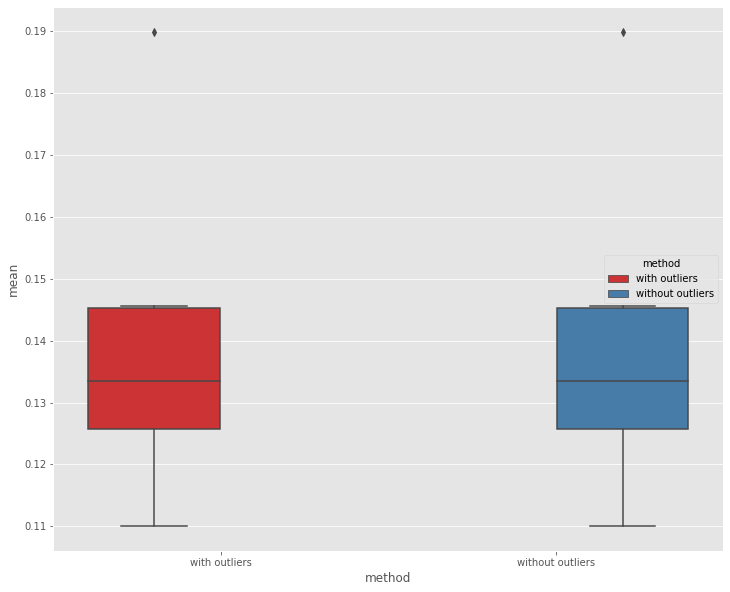

In [33]:
boxplot_results(normal_f1_list, outlier_f1_list)

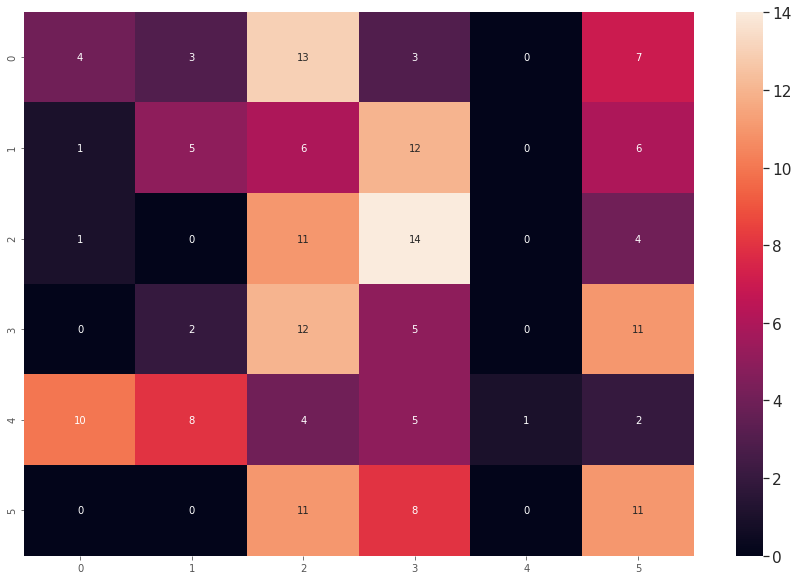

In [34]:
conf_matrix(normal_conf_matrix, normal_f1_list)

É possível observar que a matriz de confusão apresenta concentrações nas classes 2, 3 e 5, sendo a 3 a classe mais escolhida pelo modelo, ele parece tender muito para ela, não é um bom classificador.

In [35]:
index_best = normal_f1_list.index(max(normal_f1_list))
class_repo_list_best = normal_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.25      0.13      0.17        30
        hook       0.28      0.17      0.21        30
         lat       0.27      0.37      0.31        30
        palm       0.11      0.17      0.13        30
       spher       1.00      0.03      0.06        30
         tip       0.19      0.37      0.25        30

    accuracy                           0.21       180
   macro avg       0.35      0.21      0.19       180
weighted avg       0.35      0.21      0.19       180



### Repeated K-fold 

>1 mean=0.0776 std=0.008
>2 mean=0.0811 std=0.014
>3 mean=0.0815 std=0.014
>4 mean=0.0817 std=0.014
>5 mean=0.0826 std=0.013
>6 mean=0.0827 std=0.013
>7 mean=0.0829 std=0.013
>8 mean=0.0829 std=0.013
>9 mean=0.0831 std=0.013


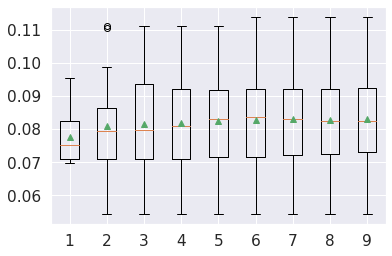

In [36]:
knn = KNeighborsClassifier(**knn_best)
best_score = repeated_KFold(knn, df_all)


In [37]:
best_score

0.08310086841260235

In [38]:
dict_results['knn_kfold_repeated'] = best_score

## Decision Tree

As árvores de decisão (DTs) são um método de aprendizagem supervisionado não paramétrico utilizado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável alvo através do aprendizado de regras de decisão simples inferidas a partir das características dos dados. Uma árvore pode ser vista como uma aproximação constante por partes.

Algumas vantagens das árvores de decisão são:

- Simples de entender e de interpretar. As árvores podem ser visualizadas.

- Requer pouca preparação de dados. Outras técnicas muitas vezes requerem normalização dos dados, variáveis fictícias precisam ser criadas e valores em branco precisam ser removidos. Observe, entretanto, que este módulo não suporta valores ausentes.

- O custo de usar a árvore (isto é, prever dados) é logarítmico no número de pontos de dados usados para treinar a árvore.

- Utiliza um modelo de caixa branca. Se uma determinada situação é observável em um modelo, a explicação da condição é facilmente explicada pela lógica booleana. Em contraste, em um modelo de caixa preta (por exemplo, em uma rede neural artificial), os resultados podem ser mais difíceis de interpretar.

- É possível validar um modelo usando testes estatísticos. Isso torna possível contabilizar a confiabilidade do modelo.

- Funciona bem mesmo que suas suposições sejam de alguma forma violadas pelo modelo verdadeiro a partir do qual os dados foram gerados.

### Modelo baseline

In [39]:
pca = PCA(.50)

scaler = StandardScaler()


X_train, X_test, y_train, y_test = create_X_y_df(df_all)

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

print("Modelo baseline")
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['dtree_baseline'] = base_f1

Modelo baseline
Model Performance
Accuracy = 0.32660%.
F1 = 0.33719%.


### Grid Search para achar parâmetros

In [40]:
data = df_all.copy()
data = data.values
X, y = data[:, :-1], data[:, -1]

pca = PCA(.50)

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
pca.fit(X)
X = pca.transform(X)

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree = DecisionTreeClassifier()
best_params, best_score = grid_search(dtree, param_grid, 10, X, y)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.1s
[CV] END ........................criterion=gini, max_depth=4; total time=   0.1s
[CV] END ........................criterion=gin

[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=13; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.2s
[CV] END .......................criterion=gini, max_depth=14; total time=   0.2s
[CV] END ...................

[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.5s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=11; total time=   0.4s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.5s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.5s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.5s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.5s
[CV] END ....................criterion=entropy, max_depth=12; total time=   0.5s
[CV] END ...................

In [41]:
print(best_params)
dtree_best = best_params

{'criterion': 'entropy', 'max_depth': 14}


In [42]:
best_score

0.29232641100074364

### K-Fold com e sem a retirada de outliers


A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação.

In [43]:
dtree = DecisionTreeClassifier(**dtree_best)  
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, dtree)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.32222222222222224
F1-Score antes retirada de outliers:  0.31570843436044393
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.29444444444444445
F1-Score após retirada de outliers:  0.27529417165732256
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 105)
Acurácia antes retirada de outliers:  0.28888888888888886
F1-Score antes retirada de outliers:  0.2714607733687581
Tamanho do X_train após remover os outliers: (1539, 105)
Acurácia após retirada de outliers:  0.31666666666666665
F1-Score após retirada de outliers:  0.3027615348444016
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de

In [44]:
print(np.amax(normal_f1_list))
print(np.amax(outlier_f1_list))

dict_results['dtree_kfold'] = max(normal_f1_list)
dict_results['dtree_kfold_outlier'] = max(outlier_f1_list)

0.32514468691316256
0.3160281316371186


In [45]:
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Sem retirada de outliers
Desvio padrão: 0.029734369940608973
Média: 0.2771461853351481
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.02159446652721181
Média: 0.27680971690540473


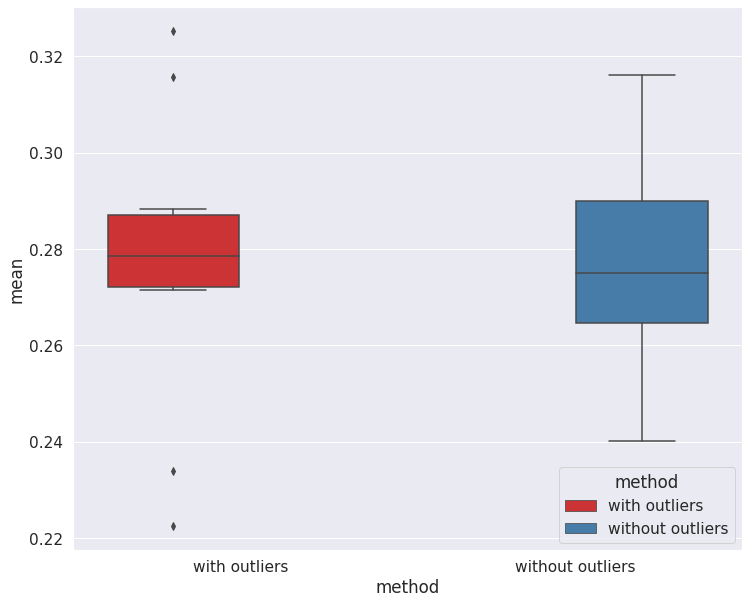

In [46]:
boxplot_results(normal_f1_list, outlier_f1_list)

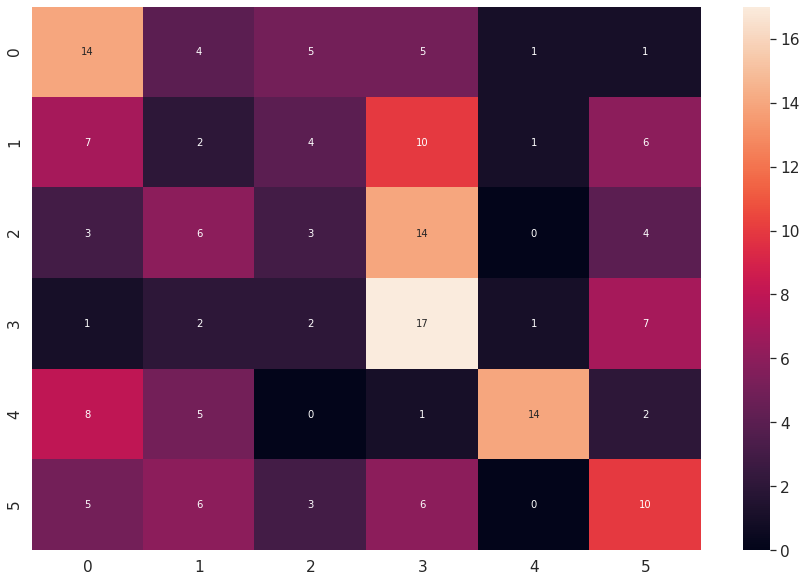

In [47]:
conf_matrix(normal_conf_matrix, normal_f1_list)

In [48]:
index_best = normal_f1_list.index(max(normal_f1_list))
class_repo_list_best = normal_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.37      0.47      0.41        30
        hook       0.08      0.07      0.07        30
         lat       0.33      0.33      0.33        30
        palm       0.32      0.57      0.41        30
       spher       0.82      0.47      0.60        30
         tip       0.18      0.10      0.13        30

    accuracy                           0.33       180
   macro avg       0.35      0.33      0.33       180
weighted avg       0.35      0.33      0.33       180



### Repeated K-Fold

>1 mean=0.3178 std=0.024
>2 mean=0.3065 std=0.032
>3 mean=0.3092 std=0.030
>4 mean=0.3052 std=0.037
>5 mean=0.3093 std=0.035
>6 mean=0.3120 std=0.033
>7 mean=0.3063 std=0.037
>8 mean=0.3080 std=0.035
>9 mean=0.3069 std=0.032


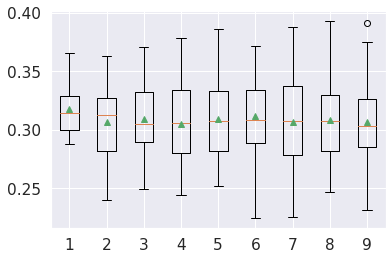

In [49]:
dtree = DecisionTreeClassifier(**dtree_best)
best_score = repeated_KFold(dtree, df_all)

In [50]:
best_score

0.31775256488386167

In [51]:

dict_results['dtree_kfold_repeated'] = best_score

## Random Forest

Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizagem em conjunto para classificação, regressão e outras tarefas que operam através da construção de uma multiplicidade de árvores de decisão em tempo de treinamento e produzindo a classe que é o modo das classes (classificação) ou previsão de média/ média (regressão) das árvores individuais. Florestas de decisão aleatória corrigem o hábito das árvores de decisão de se ajustarem em excesso ao seu conjunto de treinamento. Florestas aleatórias geralmente superam as árvores de decisão, mas sua precisão é menor do que as árvores de decisão de gradiente. Entretanto, as características dos dados podem afetar seu desempenho.

### Modelo baseline

In [52]:
pca = PCA(.50)

scaler = StandardScaler()


X_train, X_test, y_train, y_test = create_X_y_df(df_all)

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


base_model = RandomForestClassifier(n_estimators = 10, random_state = 11)
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['forest_baseline'] = base_f1

Model Performance
Accuracy = 0.31818%.
F1 = 0.32930%.


### Grid Search para melhorar parâmetros

In [53]:

print(X_train.shape)

n_estimators = [3, 5, 10, 25]
# Number of features to consider at every split
crit = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [5,8,9,10,12]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': crit,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

# Create a based model
rf = RandomForestClassifier()# Instantiate the grid search model

scorer = make_scorer(f1_score, average = 'weighted')

grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2, scoring=scorer)

(1206, 88)


In [54]:
grid.fit(X_train, y_train)

print(grid.best_params_)
best_grid = grid.best_estimator_
grid_f1, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_f1 - base_f1) / base_f1))

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'criterion': 'gini', 'max_depth': 11}
Model Performance
Accuracy = 0.35522%.
F1 = 0.32806%.
Improvement of -0.37878%.


In [55]:
forest_best = grid.best_params_

### K-Fold com e sem a retirada de outliers

A seguir realizaremos uma validação cruzada com o k-fold para avaliar o desempenho do algoritmo, iremos fazer a validação com a base completa e com a base com a retirada de outliers para fins de comparação.

In [56]:
forest = RandomForestClassifier(**forest_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, forest)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 105)
Acurácia antes retirada de outliers:  0.4222222222222222
F1-Score antes retirada de outliers:  0.40544027660909276
Tamanho do X_train após remover os outliers: (1539, 105)
Acurácia após retirada de outliers:  0.40555555555555556
F1-Score após retirada de outliers:  0.39117543373400243
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 108)
Acurácia antes retirada de outliers:  0.4722222222222222
F1-Score antes retirada de outliers:  0.44049764511944106
Tamanho do X_train após remover os outliers: (1539, 108)
Acurácia após retirada de outliers:  0.45
F1-Score após retirada de outliers:  0.4239261307966169
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remover os outl

In [57]:
print(np.amax(normal_f1_list))
print(np.amax(outlier_f1_list))

dict_results['forest_kfold'] = np.amax(normal_f1_list)
dict_results['forest_kfold_outlier'] = np.amax(outlier_f1_list)

0.44049764511944106
0.4457453324822914


In [58]:
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Sem retirada de outliers
Desvio padrão: 0.027553899989743384
Média: 0.3873521453690233
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.034182114854347724
Média: 0.3973330842883134


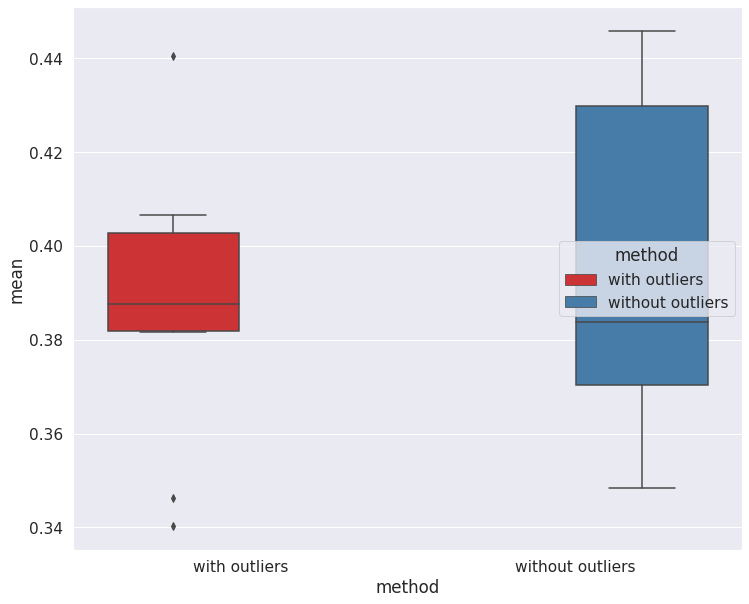

In [59]:
boxplot_results(normal_f1_list, outlier_f1_list)

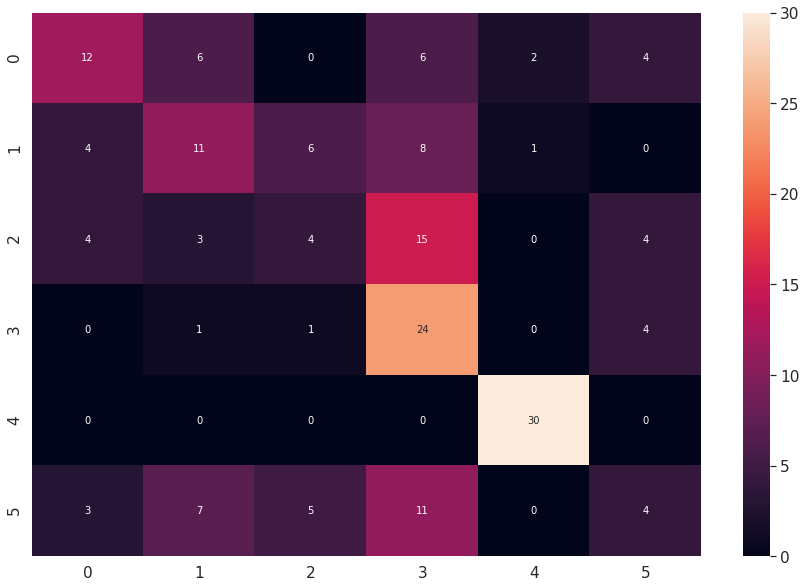

In [60]:
conf_matrix(normal_conf_matrix, normal_f1_list)

In [61]:
index_best = normal_f1_list.index(max(normal_f1_list))
class_repo_list_best = normal_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.52      0.40      0.45        30
        hook       0.39      0.37      0.38        30
         lat       0.25      0.13      0.17        30
        palm       0.38      0.80      0.51        30
       spher       0.91      1.00      0.95        30
         tip       0.25      0.13      0.17        30

    accuracy                           0.47       180
   macro avg       0.45      0.47      0.44       180
weighted avg       0.45      0.47      0.44       180



### Repeated K-Fold

In [62]:

X_train, X_test, y_train, y_test = create_X_y_df(df_all)


grid.fit(X_train, y_train)

print(grid.best_params_)
best_grid = grid.best_estimator_
grid_f1, conf_matrix_grid = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.5f}%.'.format( 100 * (grid_f1 - base_f1) / base_f1))

forest_best_1 = grid.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'criterion': 'gini', 'max_depth': 11}
Model Performance
Accuracy = 0.51178%.
F1 = 0.49398%.
Improvement of 50.00852%.


>1 mean=0.4813 std=0.026
>2 mean=0.4818 std=0.039
>3 mean=0.4701 std=0.035
>4 mean=0.4773 std=0.037
>5 mean=0.4654 std=0.033
>6 mean=0.4761 std=0.031
>7 mean=0.4719 std=0.031
>8 mean=0.4773 std=0.031
>9 mean=0.4767 std=0.036


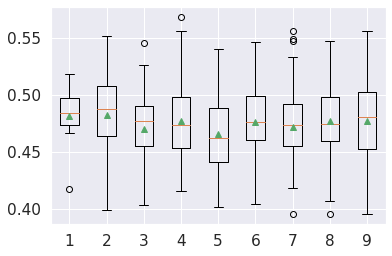

In [63]:
forest = RandomForestClassifier(**forest_best_1)
best_score = repeated_KFold(forest, df_all)

In [64]:
best_score

0.48181261704091705

>1 mean=0.4830 std=0.038
>2 mean=0.4648 std=0.031
>3 mean=0.4695 std=0.032
>4 mean=0.4763 std=0.028
>5 mean=0.4666 std=0.035
>6 mean=0.4745 std=0.036
>7 mean=0.4761 std=0.035
>8 mean=0.4780 std=0.030
>9 mean=0.4760 std=0.034


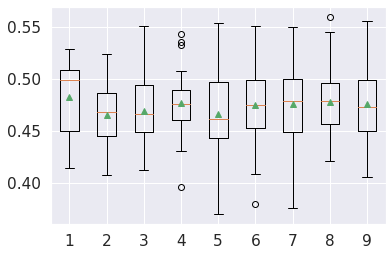

In [65]:
forest = RandomForestClassifier(**forest_best)
best_score = repeated_KFold(forest, df_all)

In [66]:
best_score

0.4829772046051719

In [67]:
dict_results['forest_kfold_repeated'] = best_score

## MLP

Um perceptron multicamadas (MLP) é uma classe de rede neural artificial feedforward (ANN). Ele consiste de pelo menos três camadas de nós: uma camada de entrada, uma camada oculta e uma camada de saída, exceto pelos nós de entrada, cada nó é um neurônio que usa uma função de ativação não linear. O MLP utiliza uma técnica de aprendizagem supervisionada chamada backpropagation para treinamento, suas múltiplas camadas e ativação não linear distinguem o MLP de um perceptron linear. Ele pode distinguir dados que não são separáveis linearmente.

### Modelo baseline

In [68]:
pca = PCA(.50)

scaler = StandardScaler()


X_train, X_test, y_train, y_test = create_X_y_df(df_all)

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


print("Modelo baseline")
base_model = MLPClassifier()
base_model.fit(X_train, y_train)
base_f1, base_conf_matrix = evaluate(base_model, X_test, y_test)

dict_results['mlp_baseline'] = base_f1

Modelo baseline
Model Performance
Accuracy = 0.25758%.
F1 = 0.26623%.


### GridSearch para melhorar parâmetros

In [69]:

data = df_all.copy()
data = data.values
X, y = data[:, :-1], data[:, -1]

pca = PCA(.50)

# Fit on training set only.
scaler.fit(X)
# Apply transform to both the training set and the test set.
X = scaler.transform(X)
pca.fit(X)
X = pca.transform(X)


In [70]:
#hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

hidden_layer_sizes = [100, 120, 150, 200]
activation = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
#max_iter = [400]

param_grid = {'hidden_layer_sizes': hidden_layer_sizes, 'activation': activation, 'solver': solver}
mlp = MLPClassifier()

best_params, best_score = grid_search(mlp, param_grid,10, X,y)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   1.0s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.8s
[CV] END activation=identity, hidden_layer_sizes=100, solver=lbfgs; total time=   0.9s
[CV] END activation=identity, hidden_layer_sizes=100, solver=sgd; t

[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.1s
[CV] END activation=identity, hidden_layer_sizes=200, solver=lbfgs; total time=   1.3s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.4s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.2s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.5s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   1.9s
[CV] END activation=identity, hidden_layer_sizes=200, solver=sgd; total time=   2.0s
[CV] END activation=identity, hidden_layer_sizes=200, s

[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.1s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.1s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=sgd; total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=adam; total time=   5.5s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=adam; total time=   5.8s
[CV] END activation=logistic, hidden_layer_sizes=150, solver=ad

[CV] END activation=tanh, hidden_layer_sizes=120, solver=sgd; total time=   5.8s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   7.0s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.2s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.2s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.7s
[CV] END activation=tanh, hidden_layer_sizes=120, solver=adam; total time=   6.3s
[CV] END activation=tanh, hidden_layer_sizes=150, solver=lbfgs; total time=   1.8s
[CV] END activat

[CV] END activation=relu, hidden_layer_sizes=100, solver=adam; total time=   4.1s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   2.0s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   2.1s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.2s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.4s
[CV] END activation=relu, hidden_layer_sizes=120, solver=lbfgs; total time=   1.7s
[CV] END activation=relu, hidden_layer_sizes=120, solver=sgd; total time=   4.1s
[CV] EN

In [71]:
best_score

0.3376055539750579

In [72]:
mlp_best = best_params
best_params

{'activation': 'relu', 'hidden_layer_sizes': 100, 'solver': 'lbfgs'}

### K-Fold com e sem a retirada de outliers

In [73]:
mlp = MLPClassifier(**mlp_best)
normal_list, outlier_list, normal_conf_matrix, outlier_conf_matrix, normal_f1_list, outlier_f1_list, normal_class_repo_list, outlier_class_repo_list = KFolds_outlier(df_all, mlp)

StratifiedKFold(n_splits=10, random_state=11, shuffle=True)
--------------------------------------------------------
Fold número:  1
Tamanho do X_train antes de remover os outliers: (1620, 104)
Acurácia antes retirada de outliers:  0.3333333333333333
F1-Score antes retirada de outliers:  0.3426558601408358
Tamanho do X_train após remover os outliers: (1539, 104)
Acurácia após retirada de outliers:  0.3277777777777778
F1-Score após retirada de outliers:  0.3393388465987998
--------------------------------------------------------
Fold número:  2
Tamanho do X_train antes de remover os outliers: (1620, 106)
Acurácia antes retirada de outliers:  0.31666666666666665
F1-Score antes retirada de outliers:  0.3227195000330052
Tamanho do X_train após remover os outliers: (1539, 106)
Acurácia após retirada de outliers:  0.2777777777777778
F1-Score após retirada de outliers:  0.2810121589909093
--------------------------------------------------------
Fold número:  3
Tamanho do X_train antes de remo

In [74]:
print(np.amax(normal_f1_list))
print(np.amax(outlier_f1_list))

dict_results['mlp_kfold'] = np.amax(normal_f1_list)
dict_results['mlp_kfold_outlier'] = np.amax(outlier_f1_list)

0.3772931480340605
0.3536255395519589


In [75]:
print("Sem retirada de outliers")
print("Desvio padrão:",np.std(normal_f1_list))
print("Média:", np.mean(normal_f1_list))
print("---------------------------------------")
print("Com retirada de outliers")
print("Desvio padrão:",np.std(outlier_f1_list))
print("Média:", np.mean(outlier_f1_list))

Sem retirada de outliers
Desvio padrão: 0.02666108316361004
Média: 0.3426816066681768
---------------------------------------
Com retirada de outliers
Desvio padrão: 0.0208861606573089
Média: 0.3231414697964783


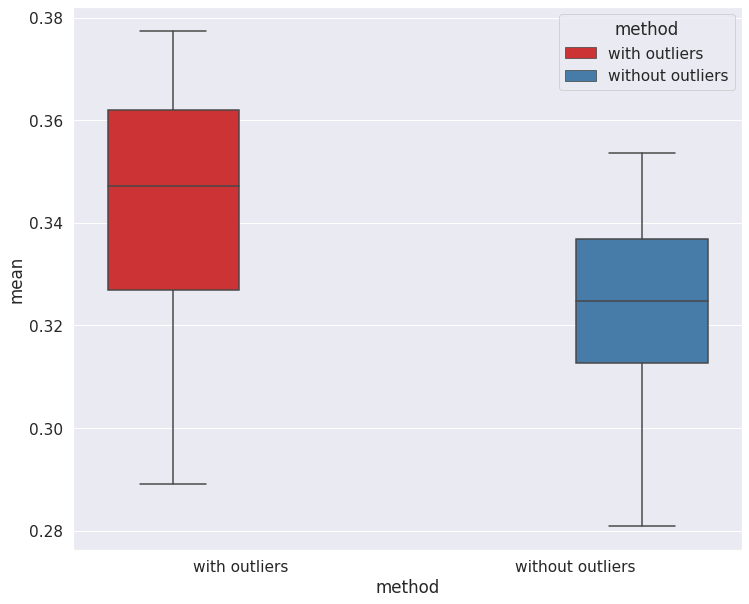

In [76]:
boxplot_results(normal_f1_list, outlier_f1_list)

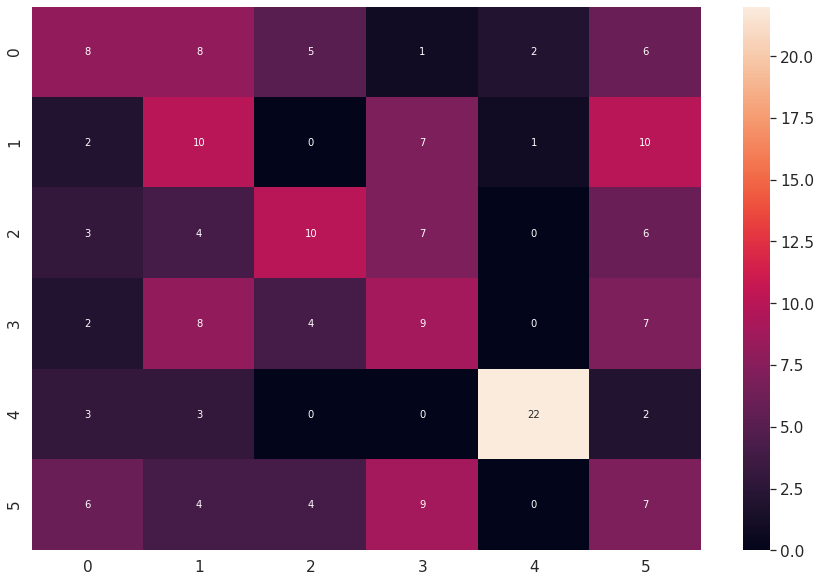

In [77]:
conf_matrix(normal_conf_matrix, normal_f1_list)

In [78]:
index_best = normal_f1_list.index(max(normal_f1_list))
class_repo_list_best = normal_class_repo_list[index_best]

print(class_repo_list_best)

              precision    recall  f1-score   support

         cyl       0.33      0.27      0.30        30
        hook       0.27      0.33      0.30        30
         lat       0.18      0.23      0.21        30
        palm       0.27      0.30      0.29        30
       spher       0.88      0.73      0.80        30
         tip       0.43      0.33      0.38        30

    accuracy                           0.37       180
   macro avg       0.40      0.37      0.38       180
weighted avg       0.40      0.37      0.38       180



### Repeated K-Fold

>1 mean=0.2973 std=0.035
>2 mean=0.2909 std=0.030
>3 mean=0.2924 std=0.032
>4 mean=0.3032 std=0.032
>5 mean=0.2926 std=0.037
>6 mean=0.2983 std=0.036
>7 mean=0.2961 std=0.036
>8 mean=0.2907 std=0.032
>9 mean=0.2976 std=0.033


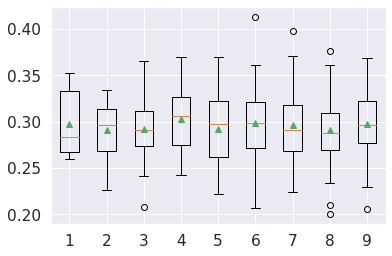

In [79]:
mlp = MLPClassifier(**mlp_best)
best_score = repeated_KFold(mlp, df_all)

In [80]:
best_score

0.30324549460210654

In [81]:
dict_results['mlp_kfold_repeated'] = best_score

## Ensemble: Neural Networks

(1800, 2501)
>mlp-nn 0.305 (0.030)
>mlp-nn1 0.335 (0.035)
>mlp-nn2 0.239 (0.030)
>stacking 0.340 (0.026)


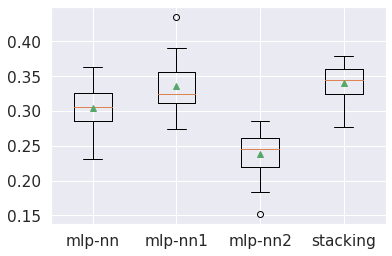

In [82]:
seed = 11
SEED = 11
np.random.seed(seed)

data = df_all #.sample(12000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]


def get_stacking():
  nn = MLPClassifier(hidden_layer_sizes = 120, solver = 'lbfgs', early_stopping=False, random_state=SEED)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('nn', nn))
  level0.append(('nn1', nn1))
  level0.append(('nn2', nn2))
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  nn = MLPClassifier(hidden_layer_sizes = 120, solver = 'lbfgs', early_stopping=False, random_state=SEED)
  nn1 = MLPClassifier(hidden_layer_sizes = 150, solver = 'sgd', early_stopping=False, random_state=SEED)
  nn2 = MLPClassifier(hidden_layer_sizes = 100, solver= 'adam', early_stopping=False, random_state=SEED)

  models = dict()
  models['mlp-nn'] = nn
  models['mlp-nn1'] = nn1
  models['mlp-nn2'] = nn2
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
    scorer = make_scorer(f1_score, average = 'weighted')
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Ensemble: modelos criados anteriormente




(1800, 2501)
>mlp-nn 0.294 (0.038)
>knn 0.081 (0.014)
>dtree 0.312 (0.033)
>forest 0.476 (0.032)
>stacking 0.476 (0.030)


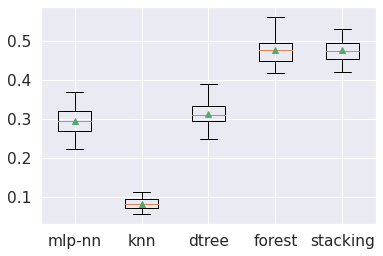

In [83]:
data = df_all #.sample(12000)
print(data.shape) 
data = data.values
X, y = data[:, :-1], data[:, -1]

def get_stacking():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  # Definindo os modelos base do stacking
  level0 = list()
  level0.append(('mlp-nn', mlp))
  level0.append(('knn', knn))
  level0.append(('dtree', dtree))
  level0.append(('forest', forest))
  
	# definindo o modelo meta learner 
  level1 = LogisticRegression()
  # definindo o ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
  return model
 

# função retorna os modelos a serem avaliados
def get_models():
  mlp = MLPClassifier(**mlp_best, early_stopping=False, random_state=seed)
  forest = RandomForestClassifier(**forest_best)
  dtree = DecisionTreeClassifier(**dtree_best)
  knn = KNeighborsClassifier(**knn_best)

  models = dict()
  models['mlp-nn'] = mlp
  models['knn'] = knn
  models['dtree'] = dtree
  models['forest'] = forest
  models['stacking'] = get_stacking()
  return models
 
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scorer = make_scorer(f1_score, average = 'weighted')
    scores = cross_val_score(model, X, y, scoring=scorer, cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [84]:
for key, value in dict_results.items():
    if key.split('_')[0] == "knn":
        print("{}: {}".format(key,value))

knn_baseline: 0.14517162552770102
knn_kfold: 0.18989422564365838
knn_kfold_outlier: 0.18989422564365838
knn_kfold_repeated: 0.08310086841260235


In [85]:
for key, value in dict_results.items():
    if key.split('_')[0] == "mlp":
        print("{}: {}".format(key,value))

mlp_baseline: 0.2662326713069435
mlp_kfold: 0.3772931480340605
mlp_kfold_outlier: 0.3536255395519589
mlp_kfold_repeated: 0.30324549460210654


In [86]:
for key, value in dict_results.items():
    if key.split('_')[0] == "dtree":
        print("{}: {}".format(key,value))

dtree_baseline: 0.3371917908760421
dtree_kfold: 0.32514468691316256
dtree_kfold_outlier: 0.3160281316371186
dtree_kfold_repeated: 0.31775256488386167


In [87]:
for key, value in dict_results.items():
    if key.split('_')[0] == "forest":
        print("{}: {}".format(key,value))

forest_baseline: 0.3293041517768503
forest_kfold: 0.44049764511944106
forest_kfold_outlier: 0.4457453324822914
forest_kfold_repeated: 0.4829772046051719
